In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

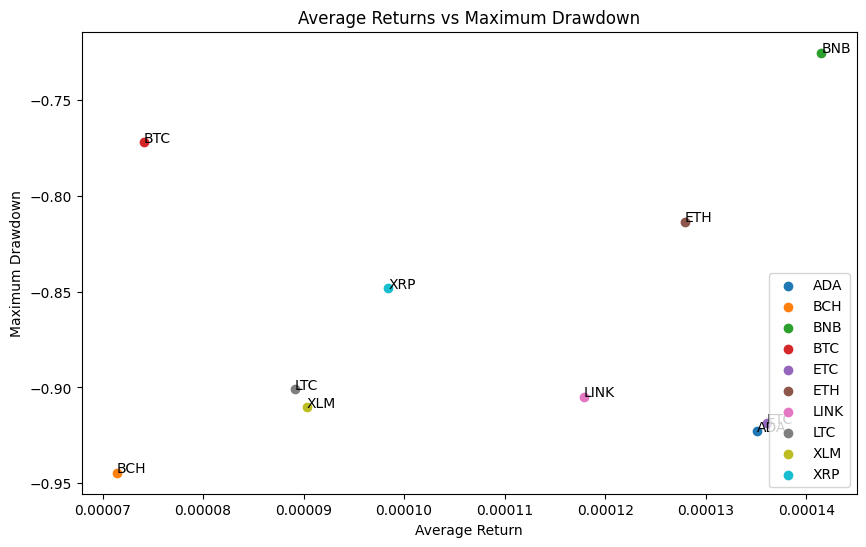

In [18]:
# Importing and cleaning data
crypto_list = ["ADA", "BCH", "BNB", "BTC", "ETC", "ETH", "LINK", "LTC", "XLM", "XRP"]
df_list = {}
for crypto in crypto_list:
    df_list[crypto] = pd.read_csv(f"{crypto}-USDT.csv")
    df_list[crypto]["date"] = pd.to_datetime(df_list[crypto]["date"], unit="ms")
    df_list[crypto] = df_list[crypto].set_index("date")
    duplicate_index = df_list[crypto].index.duplicated(keep='last')
    df_list[crypto] = df_list[crypto][~duplicate_index]


# Creating a single dataFrame
df = pd.DataFrame()
for crypto in df_list:
    df[crypto] = df_list[crypto]["close"]
df = df.dropna()


# Calculating maximum drawdown and average returns
def calculate_max_drawdown(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return drawdown.min()

max_drawdowns = df.apply(calculate_max_drawdown)
average_returns = df.pct_change().mean()

# Scatter plot with maximum drawdown
fig, ax = plt.subplots(figsize=(10, 6))
for col in df.columns:
    ax.text(average_returns[col], max_drawdowns[col], col)
    ax.scatter(average_returns[col], max_drawdowns[col], label=col)
ax.set_xlabel('Average Return')
ax.set_ylabel('Maximum Drawdown')
plt.title('Average Returns vs Maximum Drawdown')
ax.legend()
plt.show()

In [19]:
# Counting number of drawdowns exceeding 10%
def count_drawdowns(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return (drawdown <= -0.1).sum()

drawdown_counts = df.apply(count_drawdowns)

# Printing drawdown counts
print("Number of Drawdowns Exceeding 10%:")
print(drawdown_counts)

Number of Drawdowns Exceeding 10%:
ADA     26933
BCH     29552
BNB     27352
BTC     23394
ETC     29523
ETH     25067
LINK    28003
LTC     28625
XLM     28963
XRP     29765
dtype: int64
